## What is Ensemble learning?
- An Ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model. 
- A model comprised of many models is called an Ensemble model.

- Many Ensemble methods contain the same type of learning algorithms which are called homogeneous ensembles but there are
  also some methods that contain different types of learning algorithms and they are called heterogeneous ensembles.

## Types of Ensemble Learning
1. Bagging
2. Boosting

## Bootstrap Aggregation (Bagging)
- There are two main key ingredients of Bagging one is bootstrap and aggregation.
- It is a general procedure that can be used to reduce the variance for that algorithm that has high variance, typically decision trees. Bagging makes each model run independently and then aggregates the outputs at the end without preference to any model.
- Random forest is a bagging technique

- In Bagging, we actually combine several strong learners in which all the base models are overfitted models they having a very high variance and at the time of aggregation we simply try to reduce that variance without affecting the bias with which the accuracy may improve.

## Boosting
- Boosting is a kind of algorithms that is able to convert weak learners to strong learners. 
- In a Boosting technique, each algorithm i.e. base learners are trained sequentially and at every time the next learner is trying to reduce the error by updating the parameters and perform better in comparison to the previous learner.
- Boosting works by training a different set of learners sequentially and combining them for prediction, where the later learners focus more on the mistakes of the earlier learners.

### Boosting Methods
1. AdaBoost
2. Gradient Boosting
3. XGBoost

## AdaBoost
- AdaBoost assigns higher weights to misclassified data points in each iteration ensuring subsequent models focus on these points. - The influence of each weak learner is determined by its classification error.
- AdaBoost (Adaptive Boosting) is an ensemble learning algorithm that improves classification accuracy by combining multiple decision trees. 
- It assigns equal weights to all training samples initially and iteratively adjusts these weights by focusing more on misclassified datapoints for next model. 
- It effectively reduces bias and variance making it useful for classification tasks but it can be sensitive to noisy data and outliers.

## Gradient Boosting
- Gradient Boosting is a ensemble learning method used for classification and regression tasks. 
- It is a boosting algorithm which combine multiple weak learner to create a strong predictive model. 
- It works by sequentially training models where each new model tries to correct the errors made by its predecessor.
- In gradient boosting each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. 
- In each iteration the algorithm computes the gradient of the loss function with respect to the predictions and then trains a new weak model to minimize this gradient. 
- The predictions of the new model are then added to the ensemble and the process is repeated until a stopping criterion is met.

## XGBoost
- XGBoost is an optimized implementation of Gradient Boosting and is a type of ensemble learning method. 
- Ensemble learning combines multiple weak models to form a stronger model.

### How it Works?
- XGBoost uses decision trees as its base learners combining them sequentially to improve the model's performance. 
- Each new tree is trained to correct the errors made by the previous tree and this process is called boosting.
- It has built-in parallel processing to train models on large datasets quickly. 
- XGBoost also supports customizations allowing users to adjust model parameters to optimize performance based on the specific problem.

# Final Outcomes
### Bagging - Decrease Variance
### Boosting - Reduce the bias

In [9]:
# Load and preprocess dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [11]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Train Bagging, AdaBoost, and Gradient Boosting models
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [13]:
# Bagging
bagging = BaggingClassifier(RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train_scaled, y_train)
bagging_acc = accuracy_score(y_test, bagging.predict(X_test_scaled))

In [14]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train_scaled, y_train)
ada_acc = accuracy_score(y_test, ada.predict(X_test_scaled))

In [15]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42) # Learning rate initializes the weights
gb.fit(X_train_scaled, y_train)
gb_acc = accuracy_score(y_test, gb.predict(X_test_scaled))

In [16]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50, random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test_scaled))

C:\Users\pardh\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [15:11:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [17]:
import pandas as pd
result_df = pd.DataFrame({
    'model' : ['bagging', 'adaboost', 'gradient boosting', 'XGboosting'],
    'Accuracy Score' : [bagging_acc, ada_acc, gb_acc, xgb_acc]
})
result_df

,model,Accuracy Score
0,bagging,0.964912
1,adaboost,0.973684
2,gradient boosting,0.956140
3,XGboosting,0.956140


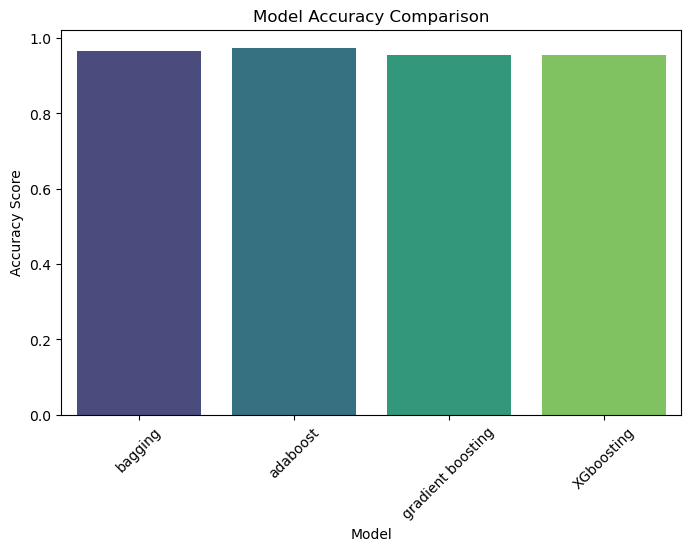

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='model', y='Accuracy Score', data=result_df, palette='viridis')

plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)

plt.show()